**In this dataset we have to predict the income of people that they earn more than 50k or less than 50k**

In [1]:
#Importing all the necessary libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df=pd.read_csv('adult_income.csv',sep=',\s')
df.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.shape

(32560, 15)

Observation:

  There are 32560 rows and 15 columns in our dataset

In [4]:
#checking for null values
df.isnull().values.any()

False

Observation:
 
Here we see there are no null values but there is a '?' present in our dataset which is treated as null value.

In [5]:
#Checking the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Observation:

    Information of the dataset that there are no missing values. But in the dataset '?' is present. So I will encode '?' as NaN value.

In [6]:
#Replacing the question mark with NaN
df=df.replace('?',np.nan)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
#Checking for null values again.
df.isnull().values.any()

True

Now it tells that nan value is present.

Now we check the no of null values present in particular columns.

In [8]:
#checking for null values.
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

Observation:

1-There are 1836 null values present in workclass columns.

2-1843 null value present in occupation column.

3-583 null value present in native_country.

<AxesSubplot:>

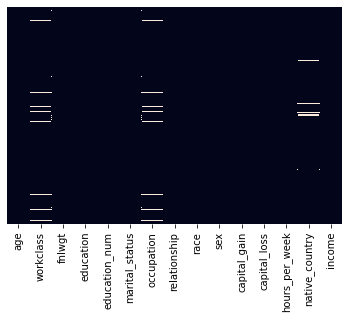

In [9]:
#Checking it via visualization
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [10]:
#Checking the information of the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30724 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      30717 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  31977 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Observation:
 
 The summary shows that the variables - workclass, occupation and native_country contain missing values.
 
 All of these variables are categorical data type. So I will impute the missing values with the most frequent value i.e.mode.

In [11]:
df['income']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32555    <=50K
32556     >50K
32557    <=50K
32558    <=50K
32559     >50K
Name: income, Length: 32560, dtype: object

In [12]:
#Imputing the missing value with mode
for col in ['workclass','occupation','native_country']:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [13]:
#Now again checking for missing values.
df.isnull().values.any()

False

Now out null values is removed. we can see it via visualization.

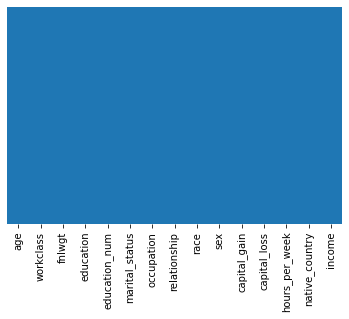

In [14]:
#Now again check it via visualization
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab20')
plt.show()

**Now our data is ready for Visualization without any missing values.**

In [15]:
#Putting the data into pandas DataFrame
df_income=pd.DataFrame(data=df)
df_income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [16]:
#Checking the various columns.
df_income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [17]:
#Checking the data types of the columns
df_income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

Observation:
    Numeric features
    Numeric_features = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
    
    Categorical features:
    categorical_features=['workclass','education','marital_status','occupation','relationship','race','sex','native_country','income']    
        

**For Analyzing the data with targer i.e income we have to change income into numeric type.**

In [18]:
#Changing the data type of target column.
df_income['income']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32555    <=50K
32556     >50K
32557    <=50K
32558    <=50K
32559     >50K
Name: income, Length: 32560, dtype: object

In [19]:
#Changing the data type of target column.

df_income['income'] = df_income['income'].map({'<=50K': 0, '>50K':1})
df_income['income'].dtypes

dtype('int64')

In [20]:
df_income['income'].unique()

array([0, 1], dtype=int64)

Observation:
    
    Here 1 stands for greater than 50K and 0 stands for less than equal to 50K

# Summary Statistics

In [21]:
df_income.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


Observation:

  1-Minimum age is 17 years and maximum age is 90 years in data set.
  
  2-Minimum education_num is 1 and maximim is 16.
  
  3-Minimum hours_per_week is 1 and maximum is 99 hours_per_week.
  
  4-In age,fnlwgt,education_num,capital_gain,capital_loss attributes mean is greater than median therefore in these attributes data is Right skewed.
  
  5-Difference between 75% and max is higher in age,fnlwgt,capital_gain,capital_loss and hours_per_week therefore outliers present in these column which we have to remove it.

# Exporing Data Variables

In [22]:
#Printing the object data types and their unique values
for column in df_income.columns:
    if df_income[column].dtype==object:
        print(str(column) + ':' + str(df_income[column].unique()))
        print(df_income[column].value_counts())
        print('***********************************************************')
        print('\n')

workclass:['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
***********************************************************


education:['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
*************

# To check the correlation

In [23]:
df_cor=df_income.corr()
df_cor

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


Here we can see the correlation between the columns.

For Better understanding we can see is via visualization(with the help of heatmap).

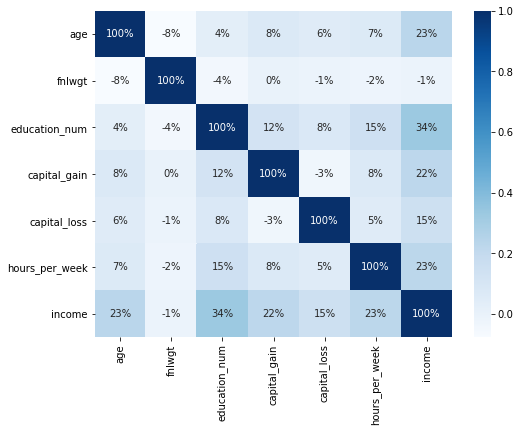

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df_cor,annot=True,fmt='.0%',cmap='Blues')
plt.show()

Text(0.5, 1.0, 'Correlation with target variable')

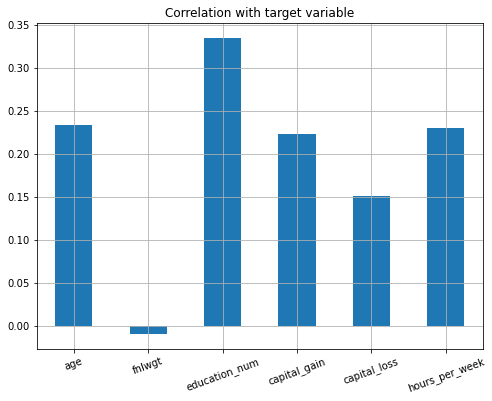

In [25]:
plt.figure(figsize=(8,6))
df_income.drop('income',axis=1).corrwith(df_income['income']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title('Correlation with target variable')

Oservation:
    
    1-fnlwgt is only negatively correlated with target variable income.
    
    2-edcation number is highly correlated with target vaiable among all input variables.

# Data Visuaization

Our feature variable of interest is income.

it refers to the monthly Income of the people.

We already change it integer valued as it contains only two number 0 and 1.

1 stands for greater than 50K

0 stands for less than equal to 50K

# Univariate Analysis

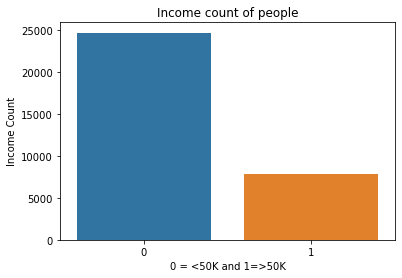

0    24719
1     7841
Name: income, dtype: int64


In [26]:
#Checking income count of people.
plt.subplots(figsize=(6,4))
sns.countplot(x='income',data=df_income)
plt.title('Income count of people')
plt.xlabel('0 = <50K and 1=>50K')
plt.ylabel('Income Count')
plt.show()

print(df_income.income.value_counts())

Observation:
    
    1-24719 peoples income is less than equal to 50K.
    
    2-Only 7841 people getting income more than 50K.

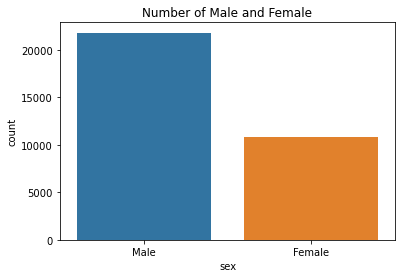

Male      21789
Female    10771
Name: sex, dtype: int64


In [27]:
#Checking number of male and female.
plt.subplots(figsize=(6,4))
sns.countplot(x='sex',data=df_income)
plt.title('Number of Male and Female')
plt.show()

print(df_income.sex.value_counts())

Observation:
     
        There are 21789 male and 10771 female

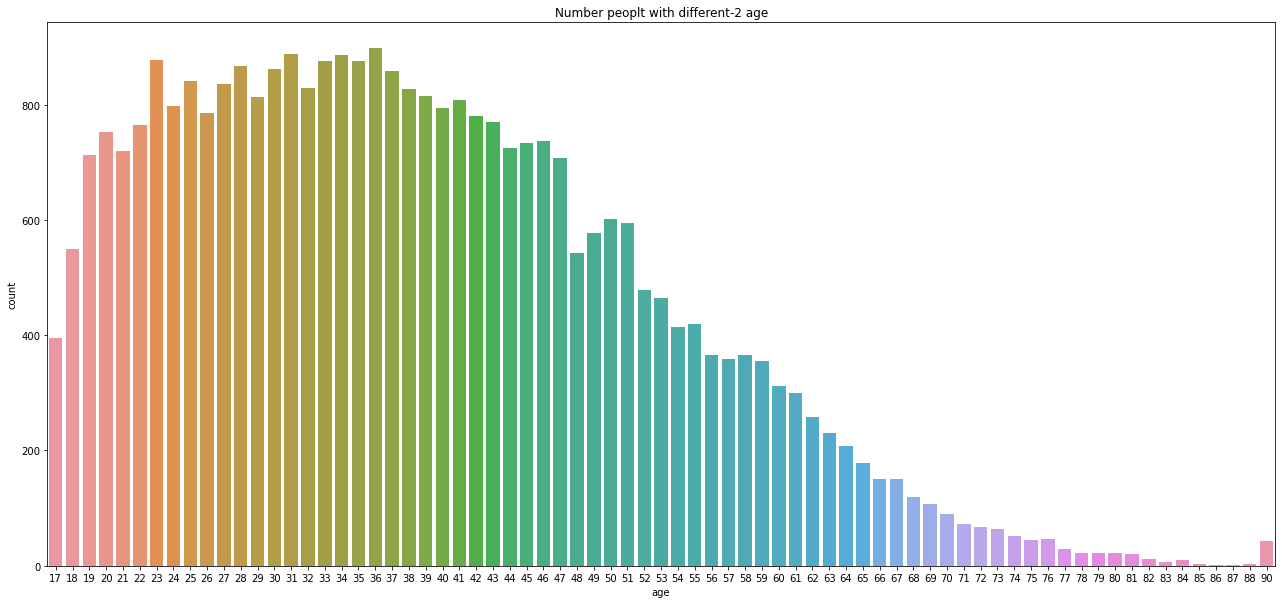

In [28]:
#Checking number of people with different-2 age grop
plt.subplots(figsize=(22,10))
sns.countplot(x='age',data=df_income)
plt.title('Number peoplt with different-2 age')
plt.show()

Observation:
    
   1-Maximum people is age of 36 years i.e 898.
      
   2-Only one people is age of 86 and 87 years.
   
   3- There are 43 peoples of age 90 years which is highest age group of our data set. 

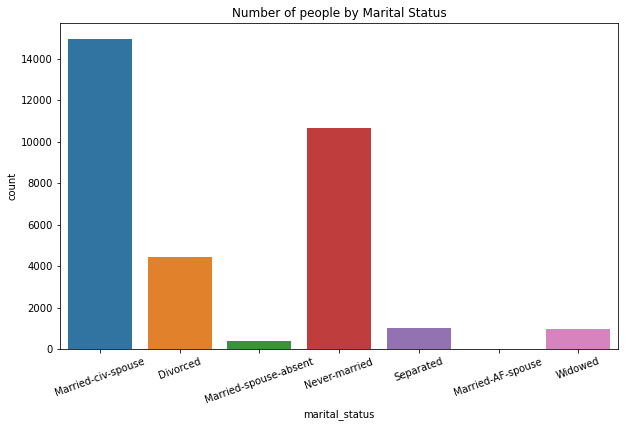

Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64


In [29]:
#Marital_status of people
plt.subplots(figsize=(10,6))
sns.countplot(x='marital_status',data=df_income)
plt.title('Number of people by Marital Status')
plt.xticks(rotation=20)
plt.show()

print(df_income.marital_status.value_counts())

Observation:
    
    Here we see the marital status of peoples that how many Seprated and how many divorce and others status.

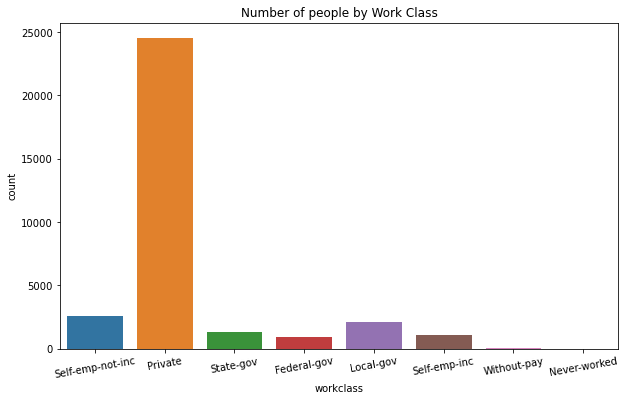

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


In [30]:
# Work_Class of people
plt.subplots(figsize=(10,6))
sns.countplot(x='workclass',data=df_income)
plt.title('Number of people by Work Class')
plt.xticks(rotation=10)
plt.show()

print(df_income.workclass.value_counts())

Findings:
    
    Above are the work place of peoples.
    
    24532 people is doing job in private sector and 7 people never worked.

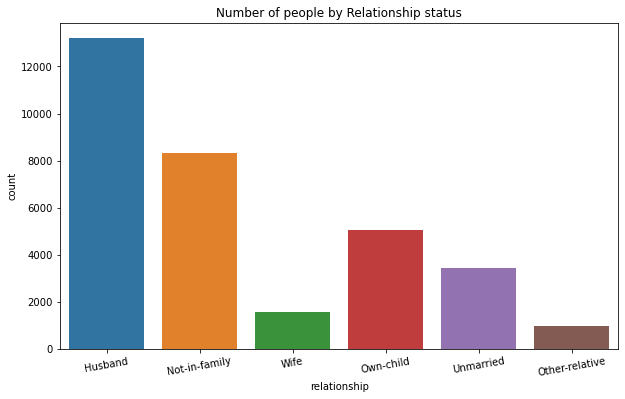

Husband           13193
Not-in-family      8304
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


In [31]:
#Relationship status of people
plt.subplots(figsize=(10,6))
sns.countplot(x='relationship',data=df_income)
plt.title('Number of people by Relationship status')
plt.xticks(rotation=10)
plt.show()

print(df_income.relationship.value_counts())

Findings:
    
    Here we see the relationship status of the peoples.

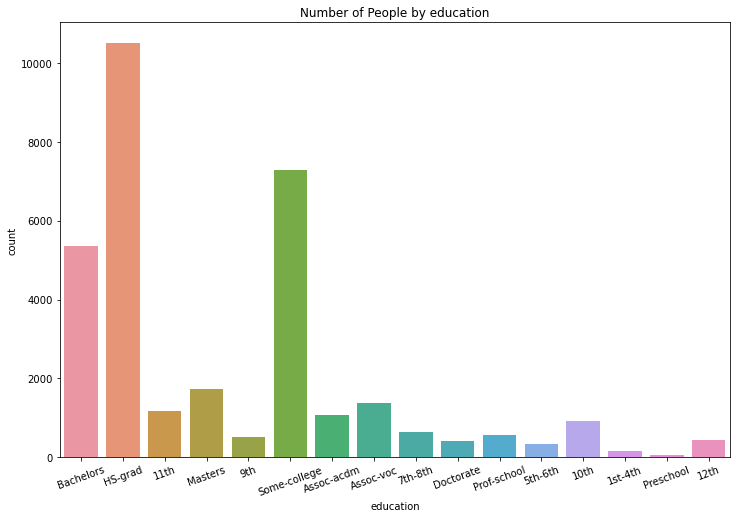

HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


In [32]:
#Checking the number of people by education
plt.subplots(figsize=(12,8))
sns.countplot(x='education',data=df_income)
plt.title('Number of People by education')
plt.xticks(rotation=20)
plt.show()

print(df_income.education.value_counts())

Findings:
    
    1-Here we saw the counting of people by education.
    
    2-Maximum number of people i.e. 10501 has studied in HS-grad and only few are i.e. 51 has studided at Preschool level.

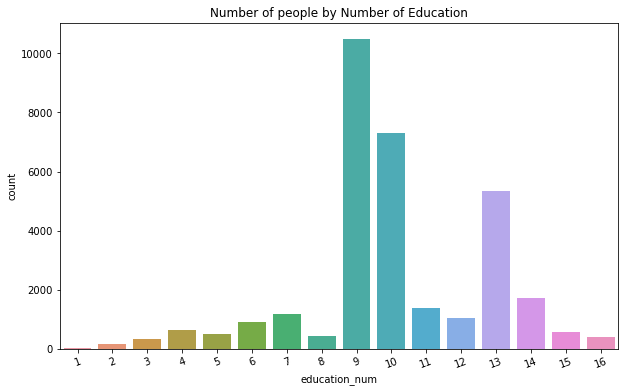

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64


In [33]:
#Checking the number of people by education number.
plt.subplots(figsize=(10,6))
sns.countplot(x='education_num',data=df_income)
plt.title('Number of people by Number of Education')
plt.xticks(rotation=20)
plt.show()

print(df_income.education_num.value_counts())

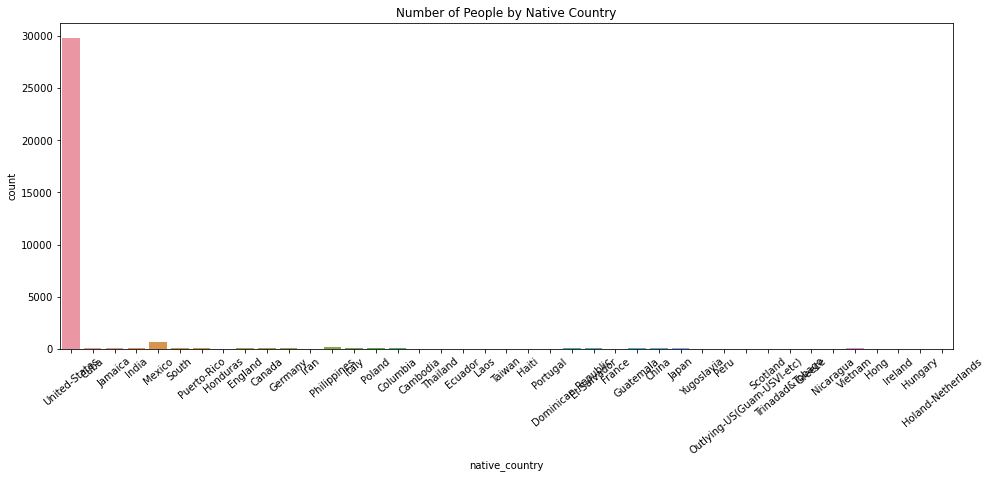

United-States                 29752
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [34]:
#Checking the number of people by Native coutry
plt.subplots(figsize=(16,6))
sns.countplot(x='native_country',data=df_income)
plt.title('Number of People by Native Country')
plt.xticks(rotation=40)
plt.show()


print(df_income.native_country.value_counts())



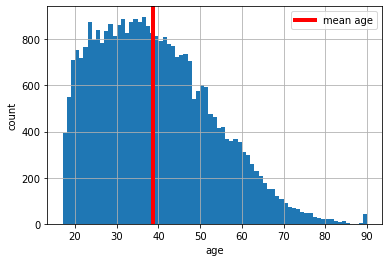

In [35]:
#checking the mean of age group
ages= df_income['age'].hist(bins=max(df_income['age']-min(df_income['age'])))
mean_val = np.mean(df_income['age'])
plt.axvline(mean_val,linewidth=4, color='red',label='mean age')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.show()

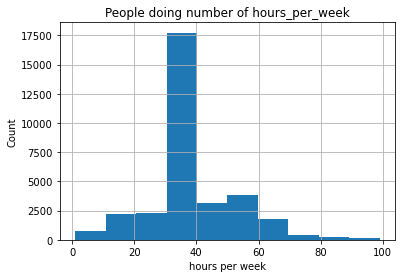

In [36]:
#Checking number of hours_per_week
df_income['hours_per_week'].hist()
plt.xlabel('hours per week')
plt.ylabel('Count')
plt.title('People doing number of hours_per_week')
plt.show()

Observation:
    
    Approx. 17500 people doing 30 to 40 hours_per_week.

# Bivariate Analysis

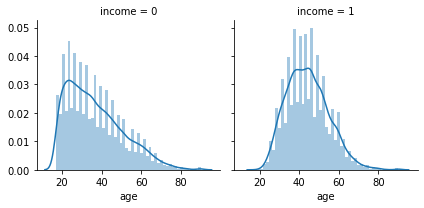

In [37]:
#Exploring age vs Income via FaceGrid
facet = sns.FacetGrid(df_income,col='income')
facet.map(sns.distplot,'age')
plt.show()

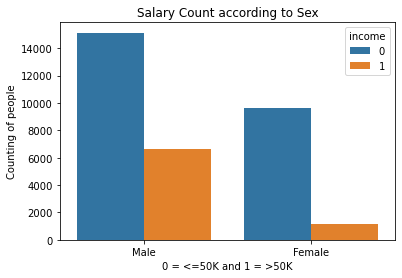

In [38]:
#Exploring sex vs income
sns.countplot(x='sex',hue='income',data=df_income)
plt.title('Salary Count according to Sex')
plt.xlabel('0 = <=50K and 1 = >50K')
plt.ylabel('Counting of people')
plt.show()

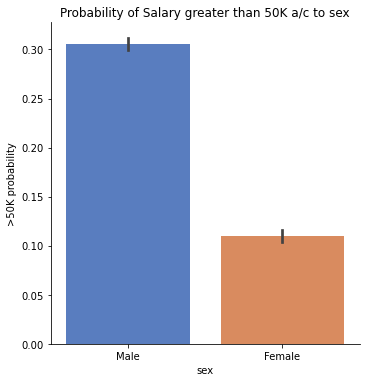

In [39]:
#factor plot of sex vs income
sns.factorplot(x='sex',y='income',data=df_income,kind='bar',size=5,palette ='muted',aspect=1)
plt.title('Probability of Salary greater than 50K a/c to sex')
plt.ylabel('>50K probability')
plt.show()

Findings:
    
    Only 30% male and 11% female got salary more than 50K.

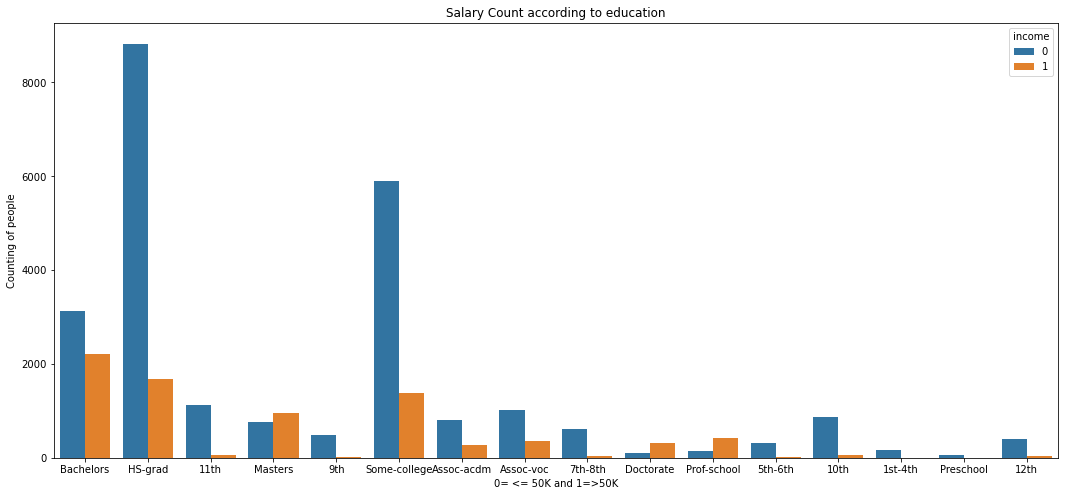

education     income
10th          0          871
              1           62
11th          0         1115
              1           60
12th          0          400
              1           33
1st-4th       0          162
              1            6
5th-6th       0          317
              1           16
7th-8th       0          606
              1           40
9th           0          487
              1           27
Assoc-acdm    0          802
              1          265
Assoc-voc     0         1021
              1          361
Bachelors     0         3133
              1         2221
Doctorate     1          306
              0          107
HS-grad       0         8826
              1         1675
Masters       1          959
              0          764
Preschool     0           51
Prof-school   1          423
              0          153
Some-college  0         5904
              1         1387
Name: income, dtype: int64


In [40]:
#education vs income
plt.subplots(figsize=(18,8))
sns.countplot(x='education',hue='income',data=df_income)
plt.title('Salary Count according to education')
plt.xlabel('0= <= 50K and 1=>50K')
plt.ylabel('Counting of people')
plt.show()

print(df_income.groupby('education')['income'].value_counts())

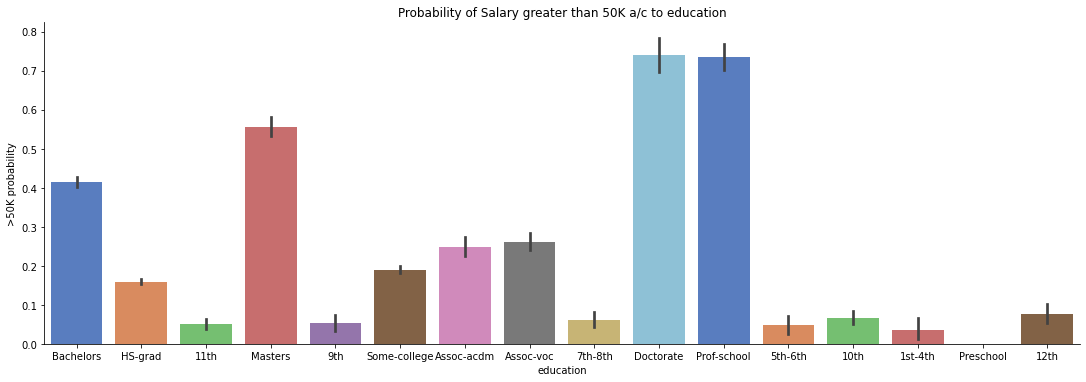

In [41]:
#Factorplot of Education vs Income
sns.factorplot(x='education',y='income',data=df_income,kind='bar',size=5,palette='muted',aspect=3)
plt.title('Probability of Salary greater than 50K a/c to education')
plt.ylabel('>50K probability')
plt.show()

Findings:
    
    Approximately 75% Doctorate and prof-school professional got salary more than 50K.

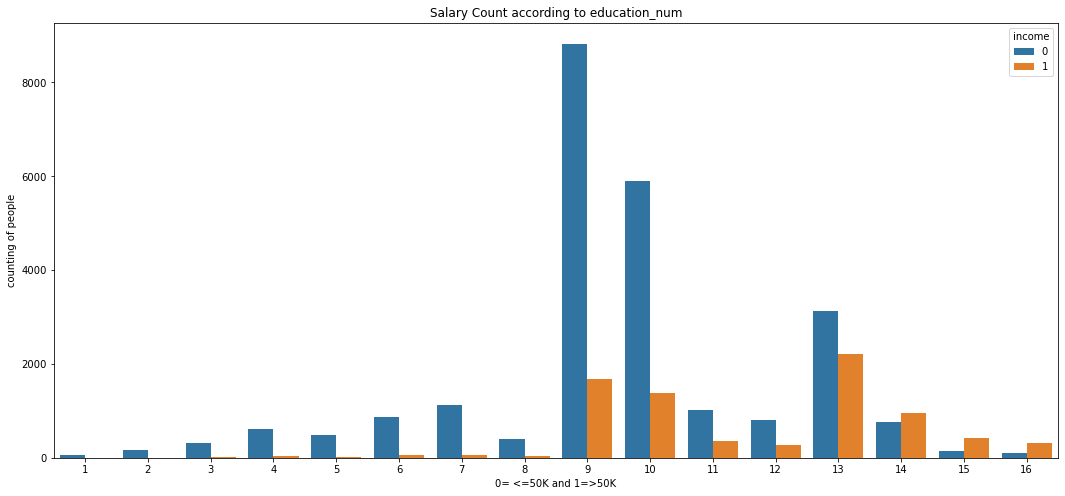

education_num  income
1              0           51
2              0          162
               1            6
3              0          317
               1           16
4              0          606
               1           40
5              0          487
               1           27
6              0          871
               1           62
7              0         1115
               1           60
8              0          400
               1           33
9              0         8826
               1         1675
10             0         5904
               1         1387
11             0         1021
               1          361
12             0          802
               1          265
13             0         3133
               1         2221
14             1          959
               0          764
15             1          423
               0          153
16             1          306
               0          107
Name: income, dtype: int64


In [42]:
#Eduction_Num vs Income
plt.subplots(figsize=(18,8))
sns.countplot(x='education_num',hue='income',data=df_income)
plt.title('Salary Count according to education_num')
plt.xlabel('0= <=50K and 1=>50K')
plt.ylabel('counting of people')
plt.show()

print(df_income.groupby('education_num')['income'].value_counts())

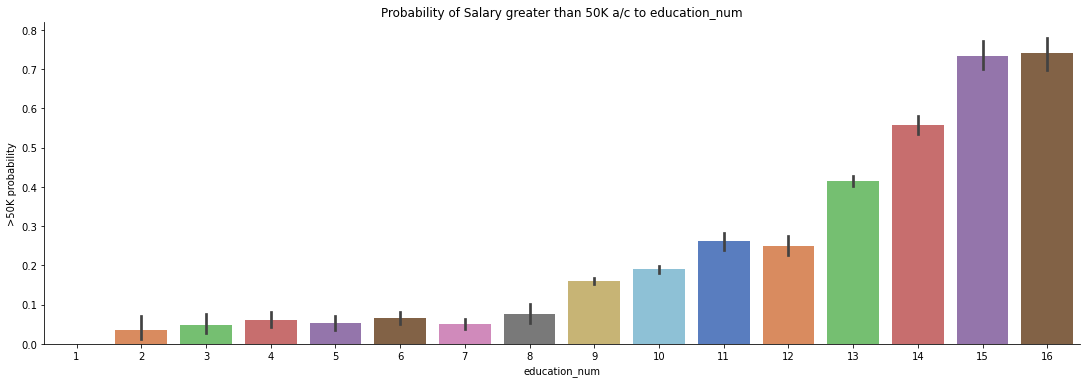

In [43]:
#Factorplot for education and income
sns.factorplot(x='education_num',y='income',data=df_income,kind='bar',size=5,palette='muted',aspect=3)
plt.title('Probability of Salary greater than 50K a/c to education_num')
plt.ylabel('>50K probability')
plt.show()

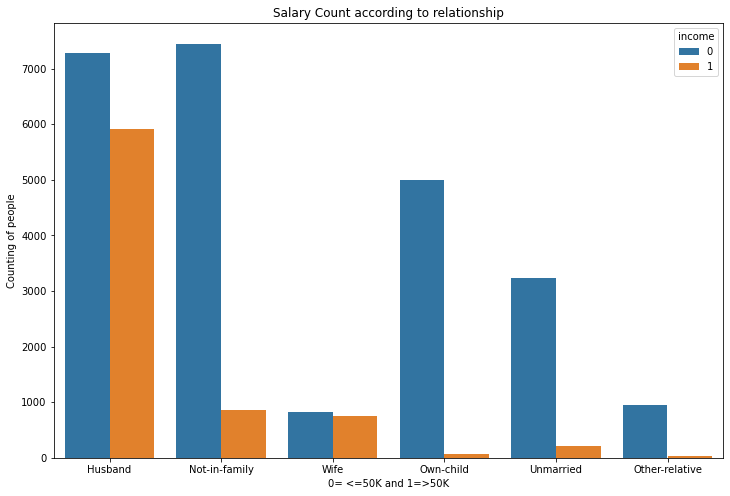

relationship    income
Husband         0         7275
                1         5918
Not-in-family   0         7448
                1          856
Other-relative  0          944
                1           37
Own-child       0         5001
                1           67
Unmarried       0         3228
                1          218
Wife            0          823
                1          745
Name: income, dtype: int64


In [44]:
#Relationship vs Income
plt.subplots(figsize=(12,8))
sns.countplot(x='relationship',hue='income',data=df_income)
plt.title('Salary Count according to relationship')
plt.xlabel('0= <=50K and 1=>50K')
plt.ylabel('Counting of people')
plt.show()

print(df_income.groupby('relationship')['income'].value_counts())

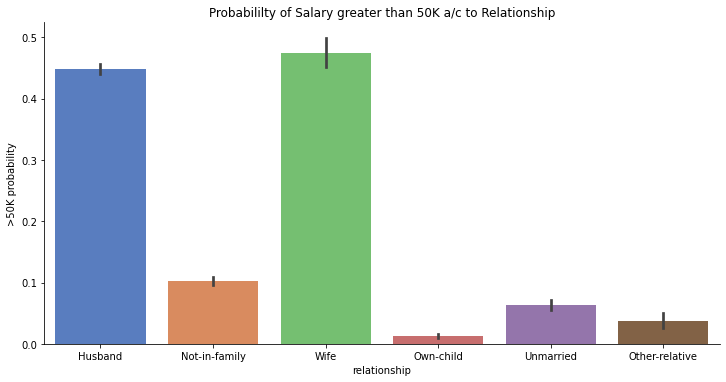

In [45]:
sns.factorplot(x='relationship',y='income',data=df_income,kind='bar',size=5,palette='muted',aspect=2)
plt.title('Probabililty of Salary greater than 50K a/c to Relationship')
plt.ylabel('>50K probability')
plt.show()

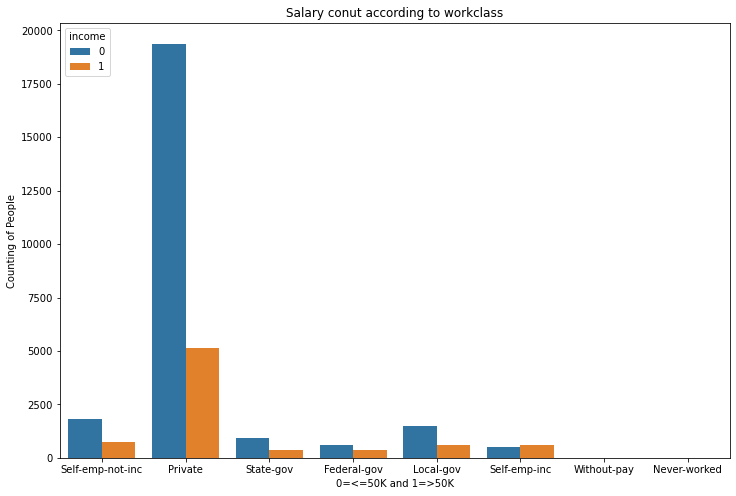

workclass         income
Federal-gov       0           589
                  1           371
Local-gov         0          1476
                  1           617
Never-worked      0             7
Private           0         19378
                  1          5154
Self-emp-inc      1           622
                  0           494
Self-emp-not-inc  0          1817
                  1           724
State-gov         0           944
                  1           353
Without-pay       0            14
Name: income, dtype: int64


In [46]:
#workclass vs Income
plt.subplots(figsize=(12,8))
sns.countplot(x='workclass',hue='income',data=df_income)
plt.title('Salary conut according to workclass')
plt.xlabel('0=<=50K and 1=>50K')
plt.ylabel('Counting of People')
plt.show()

print(df_income.groupby('workclass')['income'].value_counts())

# Checking skewness

In [47]:
#checking the skewness
df_income.skew()

age                0.558738
fnlwgt             1.446972
education_num     -0.311630
capital_gain      11.953690
capital_loss       4.594549
hours_per_week     0.227636
income             1.212383
dtype: float64

In [48]:
#Treating skewness via square root method and cube root method.
df_income.skew()
for col in df_income.skew().index:
    if col in df_income.describe().columns:
        if df_income[col].skew()>0.55:
            df_income[col]=np.sqrt(df_income[col])
        if df_income[col].skew()<0.55:
            df_income[col]=np.cbrt(df_income[col])

In [49]:
#Agin checking the skewness.
df_income.skew()

age              -0.021391
fnlwgt           -0.506219
education_num    -1.330790
capital_gain      5.894949
capital_loss      4.376279
hours_per_week   -1.451275
income            1.212383
dtype: float64

# Converting the categorical data into numeric variables

In [52]:
#Transform Non numeric columns into Numeric columns.
from sklearn import preprocessing 

le = preprocessing.LabelEncoder()

for column in df_income.columns:
    if df_income[column].dtype==np.number:
        continue
    df_income[column]=le.fit_transform(df_income[column]) 
    
    

In [53]:
df_income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,1.919383,5,6.608716,9,2.351335,2,3,0,4,1,0.0,0.0,2.351335,38,0.0
1,1.833569,3,7.743849,11,2.080084,0,5,1,4,1,0.0,0.0,3.419952,38,0.0
2,1.938114,3,7.854020,1,1.912931,2,5,0,2,1,0.0,0.0,3.419952,38,0.0
3,1.742581,3,8.347831,9,2.351335,2,9,5,2,0,0.0,0.0,3.419952,4,0.0
4,1.825437,3,8.110256,12,2.410142,2,3,5,4,0,0.0,0.0,3.419952,38,0.0


# Ploting Outliers

<AxesSubplot:>

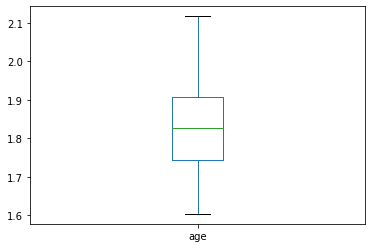

In [54]:
df_income['age'].plot.box()

<AxesSubplot:>

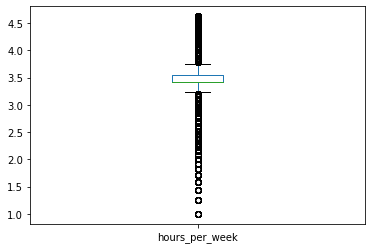

In [55]:
df_income['hours_per_week'].plot.box()

<AxesSubplot:>

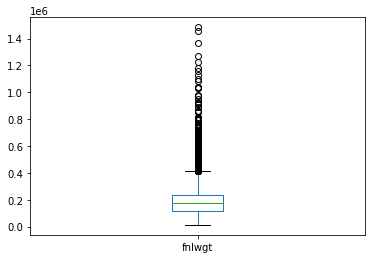

In [56]:
df['fnlwgt'].plot.box()

Observation:
    
    There are some outlier are present in our data which we have to remove it.

# Removing Outliers

In [57]:
from scipy.stats import zscore
z=np.abs(zscore(df_income))
z

array([[0.89173505, 1.72133587, 1.06991994, ..., 2.59368713, 0.26137428,
        0.5632099 ],
       [0.10461133, 0.08522344, 0.44809231, ..., 0.07877413, 0.26137428,
        0.5632099 ],
       [1.06354264, 0.08522344, 0.59542287, ..., 0.07877413, 0.26137428,
        0.5632099 ],
       ...,
       [1.33266535, 0.08522344, 0.1392861 , ..., 0.07877413, 0.26137428,
        0.5632099 ],
       [1.35967324, 0.08522344, 0.3315621 , ..., 1.68566782, 0.26137428,
        0.5632099 ],
       [1.00719481, 0.81805622, 0.95923104, ..., 0.07877413, 0.26137428,
        1.77553698]])

In [58]:
threshold=3
print(np.where(z>3))

(array([    3,     7,    10, ..., 32550, 32552, 32559], dtype=int64), array([13, 10,  8, ...,  8,  8, 10], dtype=int64))


In [59]:
new_income=df_income[(z<3).all(axis=1)]

In [60]:
#Checking the shape
print(df_income.shape,'\t\t',new_income.shape)

(32560, 15) 		 (27065, 15)


In [62]:
df_income=new_income
df_income.shape

(27065, 15)

# Model Training

In [63]:
df_income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,1.919383,5,6.608716,9,2.351335,2,3,0,4,1,0.0,0.0,2.351335,38,0.0
1,1.833569,3,7.743849,11,2.080084,0,5,1,4,1,0.0,0.0,3.419952,38,0.0
2,1.938114,3,7.854020,1,1.912931,2,5,0,2,1,0.0,0.0,3.419952,38,0.0
4,1.825437,3,8.110256,12,2.410142,2,3,5,4,0,0.0,0.0,3.419952,38,0.0
5,1.912931,3,7.369498,6,1.709976,3,7,1,2,0,0.0,0.0,2.519842,22,0.0


In [64]:
#Splitting the data into and output variable.
x=df_income.drop(columns=['income'],axis=1)
x.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,1.919383,5,6.608716,9,2.351335,2,3,0,4,1,0.0,0.0,2.351335,38
1,1.833569,3,7.743849,11,2.080084,0,5,1,4,1,0.0,0.0,3.419952,38
2,1.938114,3,7.854020,1,1.912931,2,5,0,2,1,0.0,0.0,3.419952,38
4,1.825437,3,8.110256,12,2.410142,2,3,5,4,0,0.0,0.0,3.419952,38
5,1.912931,3,7.369498,6,1.709976,3,7,1,2,0,0.0,0.0,2.519842,22


In [65]:
y=df_income['income']
y.head()

0    0.0
1    0.0
2    0.0
4    0.0
5    0.0
Name: income, dtype: float64

In [66]:
#Checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(27065, 14) 		 (27065,)


# Scaling in input variables

In [67]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [68]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [69]:
#Checking the shape
print(x_train.shape,'\t\t',x_test.shape)

(21652, 14) 		 (5413, 14)


In [70]:
#Checking the shape
print(y_train.shape,'\t\t',y_test.shape)

(21652,) 		 (5413,)


# Importing all the model library

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

# Finding the best parameters

In [73]:
#using GridSearchCV to find out the best parameter in LogisticRegression
parameters={'C':[1,10],'random_state':range(42,100)}
lg=LogisticRegression()

clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'random_state': 42}


In [74]:
#Using GridSearchCV to find out the best parameter in KNeighborsclassifier

parameters={'n_neighbors':range(22,25)}
knn=KNeighborsClassifier()

clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 22}


In [75]:
#Models with its best parameters

LR=LogisticRegression(random_state=42)
KNN=KNeighborsClassifier(n_neighbors=24)
SVC=SVC()

In [77]:
#All Algorithm by using for loop
model=[LR,GaussianNB(),SVC,DecisionTreeClassifier(),KNN]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*******************************************************')
    print('\n')

Accuracy score of LogisticRegression(random_state=42) is:
0.8169222242748938
[[3997  242]
 [ 749  425]]
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      4239
         1.0       0.64      0.36      0.46      1174

    accuracy                           0.82      5413
   macro avg       0.74      0.65      0.68      5413
weighted avg       0.80      0.82      0.80      5413

*******************************************************


Accuracy score of GaussianNB() is:
0.781821540735267
[[3376  863]
 [ 318  856]]
              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85      4239
         1.0       0.50      0.73      0.59      1174

    accuracy                           0.78      5413
   macro avg       0.71      0.76      0.72      5413
weighted avg       0.82      0.78      0.79      5413

*******************************************************


Accuracy score of SVC() is:
0.8416774431923147

# Cross validate the models

In [78]:
models=[LR,GaussianNB(),SVC,DecisionTreeClassifier(),KNN]
for m in models:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print('Model:',m)
    print('Score',score)
    print('Mean Score:',score.mean())
    print('Standard devivation:',score.std())
    print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
    print('\n')

Model: LogisticRegression(random_state=42)
Score [0.82083487 0.81935722 0.82120429 0.81935722 0.8215737  0.82668145
 0.81448633 0.82335551 0.8240946  0.81929047]
Mean Score: 0.8210235651404435
Standard devivation: 0.00313917677639615
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


Model: GaussianNB()
Score [0.76800887 0.77281123 0.78315478 0.7691171  0.75803472 0.77974871
 0.77014043 0.77198817 0.78898744 0.7841833 ]
Mean Score: 0.7746174749922937
Standard devivation: 0.008811078066810071
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


Model: SVC()
Score [0.83819727 0.84521611 0.8507573  0.83819727 0.83856668 0.8473762
 0.84294161 0.85070214 0.84552846 0.84146341]
Mean Score: 0.8438946439536599
Standard devivation: 0.00458368262106495
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


Model: DecisionTreeClassifier()
Score [0.79128186 0.79756188 0.80199483 0.77650536 0.801256   0.79822616
 0.79563932 0.80044346 0.79526977 0.800

Above all models SVC is giving best score.

Now we use some boosting techique to boostup our score.

After that we decide that which model is best.

# Using Ensemble Technique to boostup our score

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [82]:
# All Algorithm by using for loop
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m ,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
    print('\n')
    
    

Accuracy score of RandomForestClassifier() is:
0.8475891372621467
[[3939  300]
 [ 525  649]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      4239
         1.0       0.68      0.55      0.61      1174

    accuracy                           0.85      5413
   macro avg       0.78      0.74      0.76      5413
weighted avg       0.84      0.85      0.84      5413

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


Accuracy score of AdaBoostClassifier() is:
0.853870312211343
[[4006  233]
 [ 558  616]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      4239
         1.0       0.73      0.52      0.61      1174

    accuracy                           0.85      5413
   macro avg       0.80      0.73      0.76      5413
weighted avg       0.84      0.85      0.84      5413

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


Accuracy score of GradientBoostingClassifie

In [84]:
#Cross validate the Boosting models
models=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in models:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print('Model:',m)
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('Standard deviation:',score.std())
    print('*************************************************************************')
    print('\n')

Model: RandomForestClassifier()
Score: [0.83524197 0.84817141 0.84891023 0.8393055  0.84263022 0.83887657
 0.84922395 0.8481153  0.85218034 0.84478936]
Mean Score: 0.8447444841342324
Standard deviation: 0.0052402491277279886
*************************************************************************


Model: AdaBoostClassifier()
Score: [0.84817141 0.84706317 0.86073144 0.84558552 0.8537126  0.85181079
 0.85698448 0.86031042 0.85772358 0.85291944]
Mean Score: 0.8535012836611221
Standard deviation: 0.005141566606285373
*************************************************************************


Model: GradientBoostingClassifier()
Score: [0.85223495 0.8566679  0.8655338  0.85408201 0.8566679  0.85735403
 0.85735403 0.86289727 0.85883222 0.85181079]
Mean Score: 0.8573434890408951
Standard deviation: 0.004103659985691695
*************************************************************************


Model: BaggingClassifier()
Score: [0.82674547 0.83413373 0.83265608 0.83450314 0.83376431 0.8285291

Gradient Boosting Classifier Gives best score and it is not suffering from underfitting and overfitting.

So we choose Gradient Boosting Classifier as out best Model.

In [85]:
#GradientBoostclassifier with best result
gbc=GradientBoostingClassifier(learning_rate=0.1,random_state=59,n_estimators=200)
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.8636615555145021
[[4012  227]
 [ 511  663]]
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      4239
         1.0       0.74      0.56      0.64      1174

    accuracy                           0.86      5413
   macro avg       0.82      0.76      0.78      5413
weighted avg       0.86      0.86      0.86      5413



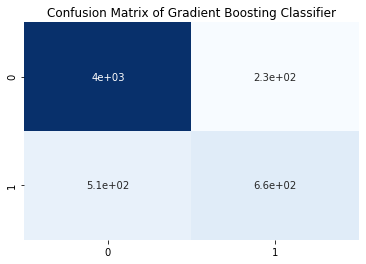

In [86]:
#Plotting confusion matrix for Gradient Boosting classifier
cm=confusion_matrix(y_test,predgbc)
sns.heatmap(cm,annot=True,cbar=False,cmap='Blues')

plt.title('Confusion Matrix of Gradient Boosting Classifier')
plt.show()

# AUC_ROC CURVE and Finding auc score

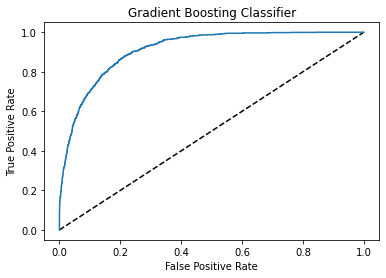

0.7555927899166216


In [89]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=gbc.predict_proba(x_test)[:,1]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier')
plt.show()

auc_score=roc_auc_score(y_test,predgbc)
print(auc_score)

In [90]:
#Saving this model
import joblib
#save the model as a pickle in a file
joblib.dump(gbc,'Adult_income_gbc.pkl')

['Adult_income_gbc.pkl']